# Statistik-Labor Testat Aufgabe 1
***Hinweise:***
- Bitte überprüfen Sie Ihre Resultate vor der Abgabe Ihre Ergebnisse mit den Teilergebnissen aus der Datei ***Teilergebnisse_xy.txt***. In der Datei bekommen Sie jeweils die ersten beiden Nachkommastellen des Durchschnittsalters.
- Die Unterlagen sind im **pdf-Format** in Moodle hochgeladen abzugeben. Richtige Lösungen werden nicht mehr an Sie zurückgegeben. Eine Abgabe per Email ist nicht möglich.
- Bitte füllen Sie das jeweilige **Deckblatt** mit aus und geben es mit Ihrer Lösung zusammen ab.

***Aufgabenstellung:***<br>
Sie sollen für die Personalabteilung der NANUAG die Altersverteilung der Beschäftigten analysieren. <br>
In der Datei **sr_aufg_1_xy.txt** im Unterverzeichnis **Endziffer_xy** (*„xy“ steht für die beiden Endziffern Ihrer Matrikelnummer*) finden Sie die dafür erforderlichen Daten. <br>
Diese Datei enthält folgende fünf Felder, die durch Semikolons getrennt sind: Personalnummer, Anrede („Herr“ oder „Frau“), Vorname, Nachname, Geburtsdatum.

## 1. Daten einlesen
Lesen Sie Daten in **Python** bzw. ein **Jupyter Notebook** ein. Speichern Sie sie in einem **Pandas DataFrame** ab.

***Tipp:*** Bitte beachten Sie bei der Abgabe, dass Sie auf keinen Fall die Liste mit den 100 Datensätzen ausgeben! Verwenden Sie dafür zum Beispiel die `dataframe.head(x)`-Funktion.

In [1]:
import pandas as pd

#ToDo: 1. Ersetzen Sie im Dateinamen xy durch entsprechende Matrikelnummer
#      2. Lassen Sie sich alle Daten anzeigen, um "fehlerhafte" Daten zu erkennen

df = pd.read_csv('/home/gen69/Python/Statistics/Testate/datasets/Endziffer_01/sr_aufg_1_01.txt', sep=';',
            encoding='unicode_escape', na_values='.', header = None, 
            names=['Pers.Nr.', 'Anrede', 'Vorname', 'Nachname', 'Geburtsdatum'])

# Speichere Kopie für Vergleich
original_df = df.copy()

## 2. Daten bereinigen
Führen Sie eine Datenbereinigung durch. <br>
Listen Sie in einer Tabelle auf, welche (Daten-)Sätze Sie gelöscht und welche Sätze Sie wie korrigiert haben. 

***Tipp:*** Sie können hierzu die Python Funktionen `dataframe.drop()` und `dataframe.at()` verwenden. <br>
***Beispiellösung:***
![Beispiellösung](https://drive.google.com/uc?id=1z5Gydg1HzoxZLo428862fsgsKyaHKKm9)

In [2]:
# Verbesserte Zeilen (per at())
geaendert_index = [8, 24, 65, 34]
df.at[8, 'Geburtsdatum'] = '06.01.1973'
df.at[24, 'Geburtsdatum'] = '26.10.1966'
df.at[65, 'Geburtsdatum'] = '22.11.1941'
df.at[34, 'Geburtsdatum'] = '17.08.1941'

# Zu löschende Zeilen
zu_loeschen = [62, 49, 108, 33, 64, 84]
geloeschte_zeilen = original_df.loc[zu_loeschen].copy()
geloeschte_zeilen['Änderung'] = 'gelöscht'

# Typ des Fehlers für gelöschte Zeilen definieren
fehler_typen = {
    49: 'Nicht genügend Information',
    84: 'Nicht genügend Information',
    64: 'Keine Angabe'
}
geloeschte_zeilen['Typ des Fehlers'] = geloeschte_zeilen.index.map(lambda i: fehler_typen.get(i, 'Unsinn'))

# Tabelle der geänderten Zeilen
geaenderte_zeilen = original_df.loc[geaendert_index].copy()
geaenderte_zeilen['Neues Geburtsdatum'] = df.loc[geaendert_index, 'Geburtsdatum'].values
geaenderte_zeilen['Änderung'] = 'geändert'
geaenderte_zeilen['Typ des Fehlers'] = 'Jahresangabe im falschen Format'

# Spaltenauswahl
geaenderte_zeilen = geaenderte_zeilen[['Pers.Nr.', 'Vorname', 'Nachname', 'Geburtsdatum', 'Neues Geburtsdatum', 'Änderung', 'Typ des Fehlers']]
geloeschte_zeilen = geloeschte_zeilen[['Pers.Nr.', 'Vorname', 'Nachname', 'Geburtsdatum', 'Änderung', 'Typ des Fehlers']]

# Endtabelle
aenderungstabelle = pd.concat([geaenderte_zeilen, geloeschte_zeilen])

# Ausgabe
display(aenderungstabelle)

,Pers.Nr.,Vorname,Nachname,Geburtsdatum,Neues Geburtsdatum,Änderung,Typ des Fehlers
8,9,Ursula,Finster,"January 6th, 1973",06.01.1973,geändert,Jahresangabe im falschen Format
24,25,Karin,Hartung,am 26. Oktober 1966,26.10.1966,geändert,Jahresangabe im falschen Format
65,66,Jan,Schultz,"November 22nd, 1941",22.11.1941,geändert,Jahresangabe im falschen Format
34,35,Hanna,Rau,"August 17th, 1941",17.08.1941,geändert,Jahresangabe im falschen Format
62,63,Astrid,Lenz,xxxx,NaN,gelöscht,Unsinn
49,50,Reiner,Schindler,03.,NaN,gelöscht,Nicht genügend Information
108,109,Tobias,Herbst,xxxx,NaN,gelöscht,Unsinn
33,34,Alexandra,Meier,OTscOPtrEb,NaN,gelöscht,Unsinn
64,65,Martina,Groß,,NaN,gelöscht,Keine Angabe
84,85,Daniela,Müller,05.03.,NaN,gelöscht,Nicht genügend Information


## 3. Alter bestimmen
Berechnen Sie das Alter der Beschäftigten zum Stichtag 31.12.2005. Mit „Alter“ ist hier die Anzahl der vollendeten Lebensjahre gemeint. <br>
*Beispiel:* Wer am 30.06.1975 geborgen ist, ist zum Stichtag 30 Jahre alt. <br>
(Niemand würde von sich sagen, er wäre „30,5 Jahre alt“.) Folglich wird diese Person in der Alterklasse 21 – 30 Jahre mitgezählt.

***Tipp:*** In Python ist hierzu die Pandas-Bibliothek mit ihre Funktion `pandas.to_datetime()`, sowie `pandas.year` nützlich.

In [3]:
df['Geburtsdatum'] = pd.to_datetime(df['Geburtsdatum'], dayfirst=True, errors='coerce')

# Stichtag festlegen
stichtag = pd.to_datetime("31.12.2005", dayfirst=True)

# Alter berechnen: Stichtag-Jahr minus Geburtsjahr
df['Alter'] = stichtag.year - df['Geburtsdatum'].dt.year

# Wenn jemand nach dem Stichtag Geburtstag hat, 1 Jahr abziehen
geburtstage_nach_stichtag = (
    (df['Geburtsdatum'].dt.month > stichtag.month) |
    ((df['Geburtsdatum'].dt.month == stichtag.month) & (df['Geburtsdatum'].dt.day > stichtag.day))
)
df.loc[geburtstage_nach_stichtag, 'Alter'] -= 1



## 4. Säulendiagramm mit Altersverteilung
Stellen Sie die Altersverteilung der Beschäftigten in einem gruppierten Säulendiagramm dar, in dem Männer und Frauen getrennt ausgewiesen werden.<br>
Es sollen die Altersklassen bis (einschließlich) 20 Jahre, 21 – 30 Jahre, 31 – 40 Jahre, 41 – 50 Jahre und über 50 Jahre gewählt werden.

***Tipp:*** Sie benötigen hierfür die Python Bibliothek **Matplotlib** und **NumPy** sowie aus **Pandas** die Funktion `value_counts()`. <br>
***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1f7Vz3JuSa958w8-dBTnPSI24hJxWa17F" width="300"/>
</div>

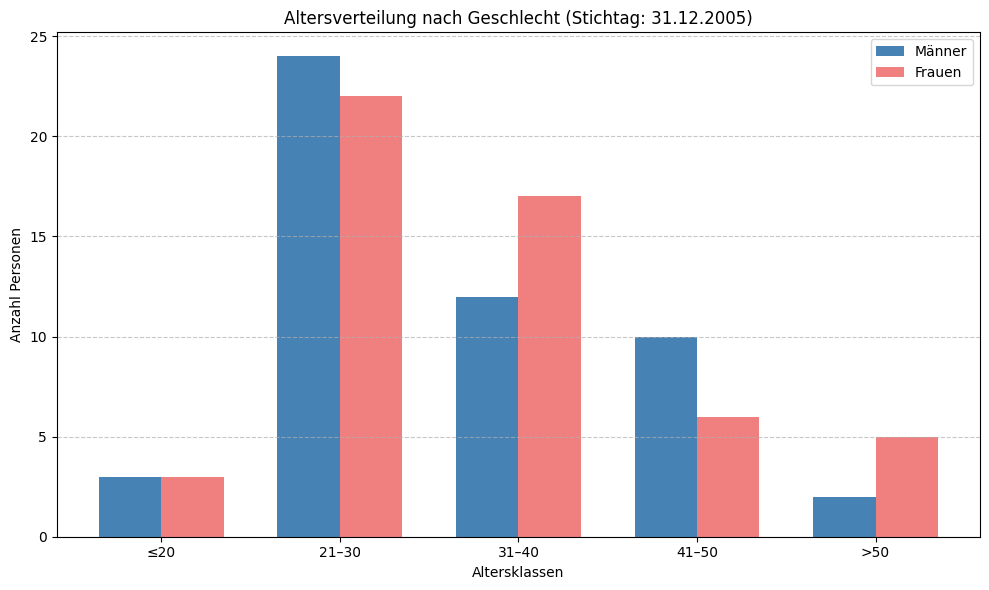

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Altersklassen definieren
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['≤20', '21–30', '31–40', '41–50', '>50']

# Altersklasse zuordnen
df['Altersklasse'] = pd.cut(df['Alter'], bins=bins, labels=labels, right=True)

# Gruppieren nach Geschlecht und Altersklasse mit observed=False
gruppen = df.groupby(['Anrede', 'Altersklasse'], observed=False).size().unstack(fill_value=0)


# Sicherstellen, dass Reihenfolge stimmt
gruppen = gruppen.reindex(index=['Herr', 'Frau'], columns=labels)

# Balkendiagramm vorbereiten
x = np.arange(len(labels))  # Positionen der Altersklassen auf X-Achse
breite = 0.35               # Breite der Balken

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(x - breite/2, gruppen.loc['Herr'], width=breite, label='Männer', color='steelblue')
ax.bar(x + breite/2, gruppen.loc['Frau'], width=breite, label='Frauen', color='lightcoral')

# Beschriftung & Layout
ax.set_xlabel('Altersklassen')
ax.set_ylabel('Anzahl Personen')
ax.set_title('Altersverteilung nach Geschlecht (Stichtag: 31.12.2005)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
ax.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## 5. Kreis-/Tortendiagramm der Altersverteilung
Stellen Sie die Altersverteilung der männlichen Beschäftigten und der weiblichen Beschäftigten in je einem Kreisdiagramm („Tortendiagramm“) dar. <br>
Die Kreissektoren sind mit den zugehörigen Prozentzahlen zu beschriften. 

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=17Z5Z8OgKw3DE4U_vD3axd7vhkkkD-N9m" width="300"/>
</div>

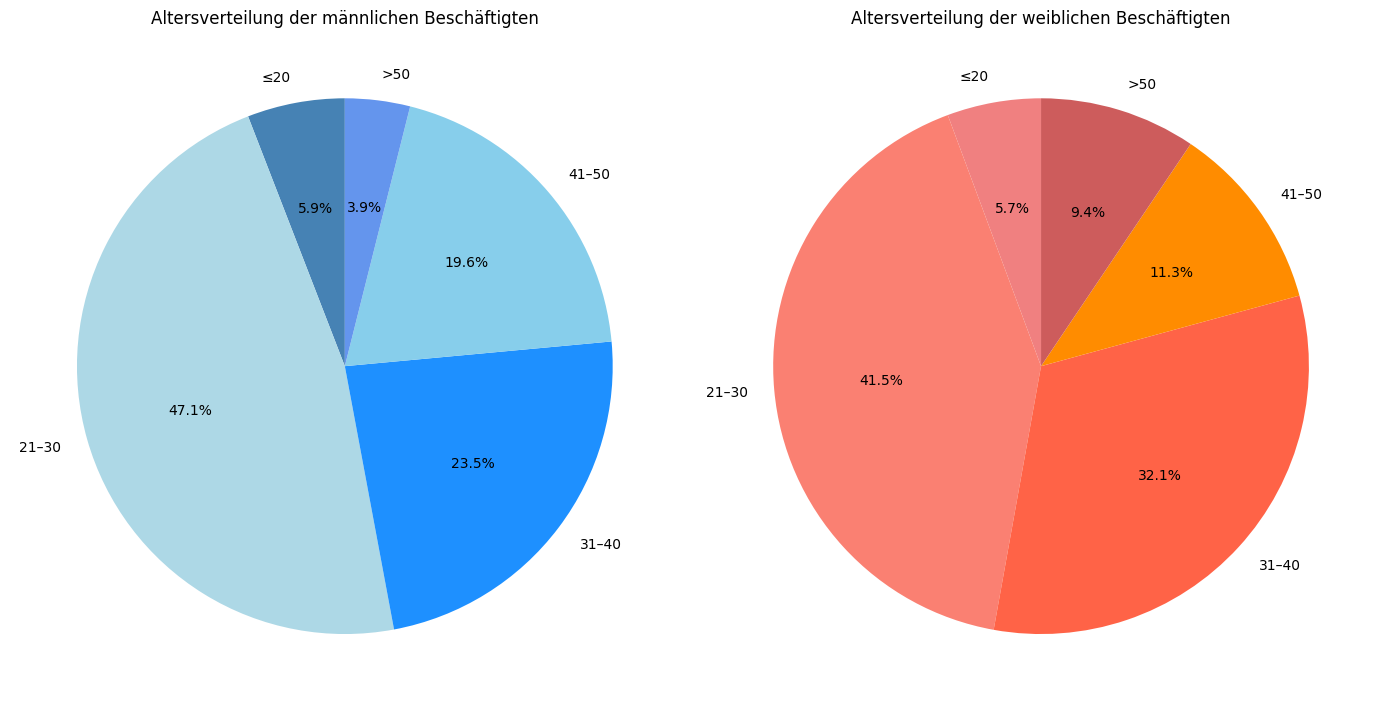

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Altersklassen definieren
bins = [0, 20, 30, 40, 50, np.inf]
labels = ['≤20', '21–30', '31–40', '41–50', '>50']

# Altersklasse zuordnen
df['Altersklasse'] = pd.cut(df['Alter'], bins=bins, labels=labels, right=True)

# Gruppieren nach Geschlecht und Altersklasse mit observed=False
gruppen = df.groupby(['Anrede', 'Altersklasse'], observed=False).size().unstack(fill_value=0)

# Daten für Männer und Frauen getrennt holen
maenner = gruppen.loc['Herr']
frauen = gruppen.loc['Frau']

# Plot
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

# Männer Kreisdiagramm
ax[0].pie(maenner, labels=labels, autopct='%1.1f%%', startangle=90, colors=['steelblue', 'lightblue', 'dodgerblue', 'skyblue', 'cornflowerblue'])
ax[0].set_title('Altersverteilung der männlichen Beschäftigten')

# Frauen Kreisdiagramm
ax[1].pie(frauen, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'salmon', 'tomato', 'darkorange', 'indianred'])
ax[1].set_title('Altersverteilung der weiblichen Beschäftigten')

# Layout anpassen
plt.tight_layout()
plt.show()


## 6. Kennzahlen
Berechnen Sie **Mittelwert**, **empirische Varianz**, **empirische Standardabweichung**, **Median** und **Spannweite** der Alterszahlen: 
- für alle Beschäftigen und
- getrennt für Männer und Frauen.

***Beispiellösung:***
<div>
<img src="https://drive.google.com/uc?id=1adhKBVlds5OlO-9B5CClT2ybPolv5wVW" width="300"/>
</div>

In [6]:
import pandas as pd

# Berechnungen für alle Beschäftigten
alle_kennwerte = {
    'Gesamt': {
        'Mittelwert': df['Alter'].mean(),
        'Varianz': df['Alter'].var(),
        'Standardabweichung': df['Alter'].std(),
        'Median': df['Alter'].median(),
        'Spannweite': df['Alter'].max() - df['Alter'].min()
    },
    'Männer': {
        'Mittelwert': df[df['Anrede'] == 'Herr']['Alter'].mean(),
        'Varianz': df[df['Anrede'] == 'Herr']['Alter'].var(),
        'Standardabweichung': df[df['Anrede'] == 'Herr']['Alter'].std(),
        'Median': df[df['Anrede'] == 'Herr']['Alter'].median(),
        'Spannweite': df[df['Anrede'] == 'Herr']['Alter'].max() - df[df['Anrede'] == 'Herr']['Alter'].min()
    },
    'Frauen': {
        'Mittelwert': df[df['Anrede'] == 'Frau']['Alter'].mean(),
        'Varianz': df[df['Anrede'] == 'Frau']['Alter'].var(),
        'Standardabweichung': df[df['Anrede'] == 'Frau']['Alter'].std(),
        'Median': df[df['Anrede'] == 'Frau']['Alter'].median(),
        'Spannweite': df[df['Anrede'] == 'Frau']['Alter'].max() - df[df['Anrede'] == 'Frau']['Alter'].min()
    }
}

# DataFrame erstellen
kennwerte_df = pd.DataFrame(alle_kennwerte)

# Ausgabe der Kennwerte
print(kennwerte_df)


                        Gesamt      Männer      Frauen
Mittelwert           33.432692   33.000000   33.849057
Varianz             117.704164  116.560000  120.707547
Standardabweichung   10.849155   10.796296   10.986699
Median               30.500000   30.000000   31.000000
Spannweite           46.000000   46.000000   45.000000
